# Quick Review: So far we have looked at aggregate demand models
Aggregate demand means that we link pricing (or other managerial actions) to total units sold.

### Linear demand function:
### $$D(p) = A-bp$$

### We estimate this using OLS on experimental data###
### $$D(p) = A-bp+e$$


Linear demand functions captures the basic intuition about demand: it is negatively affected by prices. This is captured by the assumption that $b$ is negative. It is simple to work with and has nice concave profit functions (parabolic to be exact).

Price elasticity of linear demand increases (more elastic) when price increases. Linear demand goes from inelastic at low prices to highly elastic as we raise prices. 

Linear demand also assumes that we can only give away a finite number, A, of the product even if the price was free.

Linear demand is easy to fit with data, we just need to run a simple linear regression.

### Constant elastic demand function:
### $$D(p) = p^{\beta}e^k$$

### We estimate this using OLS on log-transformed experimental data###
### $$ln(D(p)) = \beta ln(p)+k+e$$

Constant elasticity demand functions also captures the basic intuition that demand is negatively affected by prices. This is captured by the assumption that elasticity, $\beta$ is negative.

This demand function is nice to work with when we have elastic demand, in which case the profit function is concave.

However, when the demand is inelastic, since the elasticity does not change with price, we cannot maximize profit. Price should always be increased when we have inelastic demand.

On the other hand, constant elasticity demand allows demand to be infinite when price goes to 0, and demand approaches 0 (but never gets there) when price goes to infinity.

We can also estimate parameters $\beta$ and $k$ for the constant elastic model, although we have to take logs of demand and prices before running the regression.

# Problems with aggregate models


## High cost of experimentation.

Notice that the problems we solved with sales and price data involved running several price experiments. Imagine you are a grocery store that is trying to figure out the aggregate demand curve of bread. In order to do this, you have to first figure out what are the equivalent weeks on the calendar (find some weeks that historically had similar sales), and then you change the price for each of these weeks. 

If the price you selected for one or more of these weeks is a "bad" price, you could end up losing a lot of potential profits. This is why many businesses hesitate to do price experiments.

## What if we already have price changes in historical data, do we still need to run price experiments?

Short answer: **yes**.

Long answer: **yes** because...

Historical price variation is due to managers' price intuitions. Managers aren't dumb, hopefully. So that means if we are changing prices not for experimentation, there must be a reason.

This reason is typically assumed that managers **are trying to charge optimal prices**.

If mangers are anticipating changes in demand, and then charge optimal prices for those demand curves, then the resulting demand and sales data don't help us measure the demand function, rather **it maps out the optimal prices corresponding to several unknown demand functions.**

# This is a good time to introduce endogeneity

Let's begin with a regression equation:

$$y = \beta_0+\beta_1x_1+e$$

Endogeneity occurs when $e$ is correlated with an explanatory variable, in this case $x_1$.

Why is profit maximizing price decisions correlated with the error term of the demand estimation?

Suppose we try to estimate the linear demand model.

$$D=A-bp+e_1$$

However, prices are set using something close to

$$ p^{*}=\frac{A+e_1+b*c_m}{2b}+e_2 $$

If the error, $e_1$ is idiosyncratic changes to the demand that the manager anticipates, then prices are obviously correlated with the error, as they are a function of the error. In fact, we even know the direction. If the error increases, price increases.

**This causes an endogeneity issue.**

## So, what is the issue with endogeneity?

The issue is that the correlation between error term and an explanatory variable leads to bias in that explanatory variable's estimated parameter.

Let's demonstrate this with linear demand below.

### Example of Endogenous Pricing (True Demand = 10000-200p+e1, c_m = 30, c_f=2000)

In [1]:
import numpy as np, pandas as pd
from statsmodels.regression.linear_model import OLS
np.random.seed(999)
e1 = np.random.normal(0, 500, 25) # error for demand function
e2 = np.random.normal(0, 3, 25) # error in pricing
A, b, c_m, c_f = 10000, 200, 30, 2000 # True demand and cost parameters
e1, e2

(array([   63.57892199,   700.94544124,   157.40749337,  -429.22458217,
         -133.06721838,  -324.4503548 ,   783.13378447, -1045.68509531,
          728.16403187,   472.6467077 ,  -200.10059693,   157.61365202,
         -555.03041704,  -292.41076263,   -94.20478203,   406.51182453,
          -80.65235821,   800.43577535,   492.17128755,  -417.72368642,
          -93.32466996,  -429.0335368 ,  -379.88907952,  -756.02711977,
          873.88737206]),
 array([ 6.39016493,  0.21346267, -5.52492673, -1.05777209, -1.22671138,
         1.67793051,  1.42203929, -5.10790011, -3.92485964,  1.27449521,
         0.02000605, -1.41204983,  1.44156649,  3.19855891,  3.46895524,
        -0.00722926,  0.20773454,  2.5410722 ,  1.98505306, -2.12470128,
        -1.49581631,  1.81462718,  0.9016294 , -0.75368601,  1.66833024]))

##### This is endogenous pricing because managers anticipate idiosyncratic (error term in demand equation) shocks to demand and compute an optimal price

In [2]:
# Simulated prices where managers are charging close to optimal prices
# Managers can anticipate "e1" and then make pricing mistakes "e2"
p_obs = (A+e1+b*c_m)/(2*b)+e2
p_obs

array([46.54911224, 41.96582627, 34.86859201, 37.86916645, 38.44062057,
       40.86680463, 43.37987375, 32.27788716, 37.89555044, 42.45611198,
       39.51975456, 38.9819843 , 40.05399044, 42.467532  , 43.23344328,
       41.00905031, 40.00610364, 44.54216164, 43.21548127, 36.8309895 ,
       38.27087202, 40.74204333, 39.9519067 , 37.35624619, 43.85304867])

In [3]:
# Units sold where managers are using their "optimal" prices:
demand_obs = A-b*p_obs+e1
demand_obs

array([ 753.75647484, 2307.78018654, 3183.68909174, 1996.94212746,
       2178.8086677 , 1502.18872004, 2107.15903382, 2498.7374734 ,
       3149.05394401, 1981.42431111, 1895.94849147, 2361.2167922 ,
       1434.17149438, 1214.08283704, 1259.10656107, 2204.70176327,
       1918.1269137 , 1892.00344713, 1849.07503258, 2216.07841295,
       2252.5009263 , 1422.55779644, 1629.72958117, 1772.72364135,
       2103.27763772])

In [4]:
df = pd.DataFrame(zip(demand_obs, p_obs))
df.columns = ['demand', 'price']

In [5]:
% matplotlib inline
from matplotlib import pyplot as plt

In [6]:
df

,demand,price
0,753.756475,46.549112
1,2307.780187,41.965826
2,3183.689092,34.868592
3,1996.942127,37.869166
4,2178.808668,38.440621
5,1502.188720,40.866805
6,2107.159034,43.379874
7,2498.737473,32.277887
8,3149.053944,37.895550
9,1981.424311,42.456112


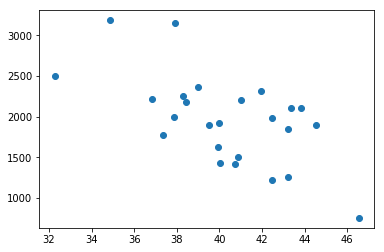

In [7]:
plt.scatter(df.price,df.demand)

### We estimate the demand equation below and show that regression result underestimates effect of price

In [8]:
from statsmodels.formula import api as smf
results = smf.ols(formula = 'demand ~ price',data =df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     14.17
Date:                Mon, 26 Mar 2018   Prob (F-statistic):            0.00101
Time:                        13:36:44   Log-Likelihood:                -186.66
No. Observations:                  25   AIC:                             377.3
Df Residuals:                      23   BIC:                             379.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6227.5644   1136.068      5.482      0.000    3877.429    8577.700
price       -105.9049     28.130     -3.765      0.001    -164.097     -47.713
==============================================================================
Omnibus:                        2.315   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.514
Skew:                           0.363   Prob(JB):                        0.469
Kurtosis:                       2.037   Cond. No.                         520.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Compare the above "sophisticated manager" to one that does experimental pricing, below

In [9]:
# If we had run an experiment with random prices from 30 to 50:
p_exper = np.random.randint(30, 50, 25)
p_exper

array([45, 46, 47, 32, 37, 44, 41, 45, 32, 31, 48, 33, 33, 32, 40, 49, 33,
       42, 34, 31, 36, 35, 41, 45, 47])

In [10]:
# Our realized demand would be:
d_exper = A-b*p_exper+e1
d_exper

array([1063.57892199, 1500.94544124,  757.40749337, 3170.77541783,
       2466.93278162,  875.5496452 , 2583.13378447,  -45.68509531,
       4328.16403187, 4272.6467077 ,  199.89940307, 3557.61365202,
       2844.96958296, 3307.58923737, 1905.79521797,  606.51182453,
       3319.34764179, 2400.43577535, 3692.17128755, 3382.27631358,
       2706.67533004, 2570.9664632 , 1420.11092048,  243.97288023,
       1473.88737206])

In [11]:
df2 = pd.DataFrame(zip(d_exper, p_exper))
df2.columns = ['demand', 'price']

In [12]:
df2

,demand,price
0,1063.578922,45
1,1500.945441,46
2,757.407493,47
3,3170.775418,32
4,2466.932782,37
5,875.549645,44
6,2583.133784,41
7,-45.685095,45
8,4328.164032,32
9,4272.646708,31


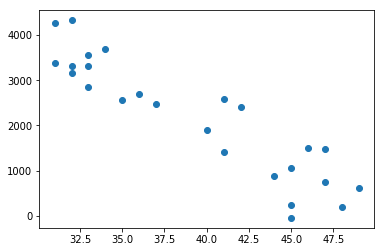

In [13]:
plt.scatter(df2.price,df2.demand)

### The parameters estimated using experimental prices, below, are unbiased in expectation

In [14]:
results2 = smf.ols(formula = 'demand~price', data = df2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           1.27e-10
Time:                        13:36:45   Log-Likelihood:                -191.47
No. Observations:                  25   AIC:                             386.9
Df Residuals:                      23   BIC:                             389.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9659.8393    689.142     14.017      0.000    8234.241    1.11e+04
price       -190.8992     17.385    -10.981      0.000    -226.863    -154.935
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.560
Skew:                          -0.013   Prob(JB):                        0.756
Kurtosis:                       2.267   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## By experimenting with prices, rather than using somewhat optimal prices, we end up with a better dataset to infer the demand curve.

# So, endogeneity sucks, does that mean we can't use historical data?

Not quite... the entire field of econometrics sprouted up to make causal inference using secondary data. There are basically the following ways to resolve endogeneity:

1. Control for more stuff by collecting data on the unobservables (this usually isn't possible). 

2. Instrumental/restriction variables. These are variables that are correlated with the endogenous variable (here we have pricing) and uncorrelated with the error term / outcome variable (demand). This is the most common approach.

3. Have a natural / quasi experiment of some kind. The idea here is to have an exogenous (opposite of endogenous) or outside "shock" to prices. For example, if there is a new government regulation that says prices have to be X. (this is the bulk of my research)

## 1. Control for more stuff

If the endogenous variable is correlated with an unobservable that we can collect data for, then it really isn't an endogeneity issue, but rather a data insufficiency issue. For example, if pricing varies based on day of week, then we just need to include variables for days of week in the regression model to control for that factor.

There are fancier ways of doing this as well (see propensity score matching), but the basic idea is the same.

### We'll simulate an example below

Let $D(p) = A-b*p+s(\text{weekend})$

On the weekend, the demand is s units more at every price.

Let's assume managers price doing the following:

$p = 40+e_2+\delta(\text(weekend))$

In other words, mangers on average charge \$40 + some random error, but then adjust their prices by \$ $\delta$ on the weekends.


In [15]:
np.random.seed(999)
periods = 100
A, b, s, c_m, c_f, delta = 150000, 200, 1500, 30, 2000, 20 # True demand and cost parameters
weekend = np.random.randint(0,2, periods) # Weekend or not
e1 = np.random.normal(0, 500, periods) # generate 25 random normals with std = 500
e2 = np.random.normal(0, 3, periods) # generate 25 random normals with std = 3
p_obs = 40+delta*weekend + e2
d_obs = A-b*p_obs+s*weekend + e1

df = pd.DataFrame(zip(*[weekend, p_obs, d_obs]))
df.columns = ['weekend', 'price', 'demand']

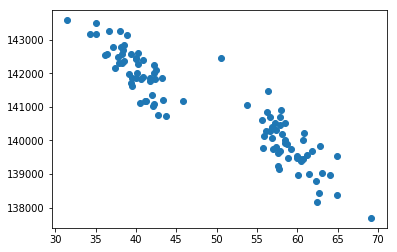

In [16]:
plt.scatter(df.price, df.demand)

In [17]:
# Let's run a regression assuming we didn't include the variable "weekend"
results = smf.ols(formula = 'demand ~ price', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     574.3
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           9.08e-43
Time:                        13:36:45   Log-Likelihood:                -769.85
No. Observations:                 100   AIC:                             1544.
Df Residuals:                      98   BIC:                             1549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.473e+05    267.526    550.494      0.000    1.47e+05    1.48e+05
price       -127.1674      5.306    -23.964      0.000    -137.698    -116.637
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.245
Skew:                           0.115   Prob(JB):                        0.885
Kurtosis:                       3.079   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If we control for weekends, our parameters for the demand function now match the real parameters

In [18]:
# Let's run a regression with weekend
results2 = smf.ols(formula = 'demand ~ price+weekend', data = df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     399.5
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           1.48e-47
Time:                        13:36:45   Log-Likelihood:                -754.98
No. Observations:                 100   AIC:                             1516.
Df Residuals:                      97   BIC:                             1524.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.507e+05    634.632    237.455      0.000    1.49e+05    1.52e+05
price       -215.5104     15.916    -13.540      0.000    -247.100    -183.921
weekend     1874.5183    323.333      5.797      0.000    1232.792    2516.245
==============================================================================
Omnibus:                        2.016   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.469
Skew:                           0.057   Prob(JB):                        0.480
Kurtosis:                       2.417   Cond. No.                         761.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

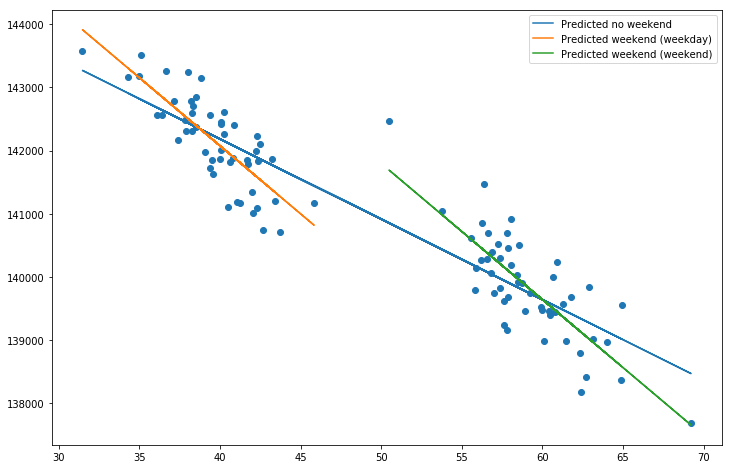

In [19]:
df['demand_pred_0'] = df.price*results.params['price']+results.params['Intercept']
df['demand_pred_1'] = df.price*results2.params['price']+df.weekend*results2.params['weekend']+results2.params['Intercept']

plt.figure(figsize = (12,8))
plt.scatter(df.price, df.demand)
plt.plot(df.price, df.demand_pred_0)
plt.plot(df[df.weekend == 0].price, df[df.weekend==0].demand_pred_1)
plt.plot(df[df.weekend == 1].price, df[df.weekend==1].demand_pred_1)
plt.legend(['Predicted no weekend', 'Predicted weekend (weekday)', 'Predicted weekend (weekend)'], loc = 1)

## 2. Instrumental Variables

Instrumental variables satisify the following 2 conditions.

1. They are correlated with the endogenous variable, controlling for everything else, i.e. they are predictive of the endogenous variable.
2. They are uncorrelated with the outcome variable, controlling for everything else, i.e. they are not predictive of the dependent variable.

Note that these are sometimes called restriction variables because their correlation is restricted to the effect on the endogenous variable.

The intuition is this. If something only affects price, then we can use variations in that "something" to map out the demand curve.

The difference between this and the previous weekend example is that weekends are correlated with price and demand. Instrumental variables should only enter the manager's pricing decision and not the demand equation.

The power of using instruments is that if you have a really good instrument (highly impacts price, does not impact demand), then it does not matter if price is also strategically determined by true unobservables (the demand shocks), you can still get unbiased estimates of the demand curve parameters. 

#### What are some common instruments for prices? 

1. Costs - costs are often assumed not to affect demand directly (only through price), but they definitely affect price. In particular, marginal costs (since they affect optimal price, $p^*$). Costs are probably the best instrument.

2. Prices of same goods in other markets. With some goods, this may be an appropriate choice of instrument, though the argument is typically weak.

### Ok, so how do we use instrumental variables?

Conceptually, let's say we have an endogenous equation we want to estimate.
$$y=\beta_0+\beta_1x_1+\beta_2x_2+...+e$$

Let's say $x_1$ is endogenous. This means we need to find at least one instrument $z_i$ that is correlated with $x_1$ but uncorrelated with $e$. Then, we do the following 2 step regression:

1. $x_1=\alpha_0+\alpha_2 x_2+\alpha_3 x_3+...+\delta_1z_1+\delta_2z_2+...+e$

    a. We can use this regression to compute $\hat{x_1}$, the predicted value of $x_1$ from equation 1. We then run the following regression.

2. $y=\beta_0+\beta_1\hat{x_1}+\beta_2x_2+...+e$

In practice, this can all be done in one step. We'll ignore the derivation of the estimator as it requires some linear algebra. However, this is a common method that has been built into statsmodels.

## We demonstrate the 2SLS estimation below on simulated data

We let demand be:
$$D(p)=A-bp+e_1$$


$$P=\frac{A+e_1+bc_m}{2b}+e_2$$


$$c_m = \bar{c}_m+e_3$$


In [67]:
np.random.seed(1000)
from statsmodels.sandbox.regression.gmm import IV2SLS # import 2SLS estimator
periods = 100
A, b, c_m_bar, c_f = 10000, 200, 30, 2000 # True demand and cost parameters
e1 = np.random.normal(0, 500, periods) # generate random normals with std = 500 Demand errors
e2 = np.random.normal(0, 3, periods) # generate random normals with std = 3 Pricing errors
e3 = np.random.normal(0, 7, periods) # generate random normals with std = 8 Cost errors
c_m = c_m_bar+e3
p_obs = (A+e1+b*c_m)/(2*b)+e2
d_obs = A-b*p_obs+ e1
df = pd.DataFrame(zip(p_obs,d_obs, c_m))
df.columns = ['price', 'demand', 'cost']

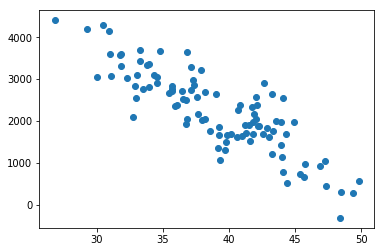

In [68]:
plt.scatter(df.price, df.demand)

#### OLS results below are biased

In [69]:
results = smf.ols(formula = 'demand~price', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     270.0
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           6.56e-30
Time:                        15:41:44   Log-Likelihood:                -762.13
No. Observations:                 100   AIC:                             1528.
Df Residuals:                      98   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8618.2412    391.230     22.029      0.000    7841.858    9394.624
price       -163.7741      9.968    -16.430      0.000    -183.555    -143.993
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.494
Skew:                           0.162   Prob(JB):                        0.781
Kurtosis:                       2.885   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Run the IVRegression

In [75]:
import statsmodels.api as sm
results = IV2SLS(df.demand, sm.add_constant(df['price']), instrument=sm.add_constant(df.cost)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.707
Model:                         IV2SLS   Adj. R-squared:                  0.704
Method:                     Two Stage   F-statistic:                     202.0
                        Least Squares   Prob (F-statistic):           1.51e-25
Date:                Mon, 26 Mar 2018                                         
Time:                        15:47:59                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9841.1232    537.143     18.321      0.000    8775.180    1.09e+04
price       -195.1874     13.732    -14.214      0.000    -222.439    -167.936
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.925
Skew:                           0.232   Prob(JB):                        0.630
Kurtosis:                       3.082   Cond. No.                         308.
==============================================================================
"""

### Think about some instruments for the following relationships

Remember, an instrument should affect the endogenous RHS variable but not the LHS outcome. First, what is the source of the endogeneity problem? Second, what are some potential instruments?

1. [The effect of the number of police officers on the amount of crime](http://pricetheory.uchicago.edu/levitt/Papers/LevittUsingElectoralCycles1997.pdf). 
2. The effect of number of customer service representatives on customer satisfaction.
3. The compensation scheme of an employee and the employee's performance.
4. The effect of advertisement spending on sales
5. [The effect of online reviews on sales](http://pubsonline.informs.org/doi/abs/10.1287/mksc.1100.0572)

# 3. Natural/Quasi Experiments

While it is nice to be able to run purposely designed experiments, it is usually not possible. Instead, looking for naturally occurring "experiments" (or other wise exogenous variation in endogenous variables) could be a worthwhile strategy.

The most classic example of this is Card & Kruger's seminal paper on the effect of minimum wage increase on unemployment to estimate the wage elasticity of employment. In this study, they took advantage of the change in minimum wage laws in New Jersey to study the change in employment for towns on the border of NJ and PA. In this setting, it is assumed that the minimum wage law is an exogenous change to the price of labor in NJ (although it may be argued that the law was endogenously passed - i.e. it was able to be passed because demand for labor was anticipated to be higher). By comparing the change in employment before and after the new minimum wage law is enacted in towns on the NJ side versus the change in employment around the matching time periods in towns on the PA side, the researchers are able to resolve the endogenous relationship between price of labor and employment.

This leads to the most widely used "identification" strategy in a natural experiment setting:

## Difference in Differences (for program evaluation)

The identification strategy discussed above is often used in program evaluation, for example evaluating the effect of implementing some new strategy like advertising.

Assume the following hypothetical example.

A company sells the same product on 2 websites. One website allows managers to bid on the search rank, so that their product comes up first. THe other website does not allow this. 

Let's also assume that managers only bid on ad space when they expect demand to be high.

Let's assume that some consumers will buy whichever link comes up first, therefore there is a fixed effect of the advertisement on demand at every price. Furthermore, assume that prices are fixed across sites, i.e. this is an industry where prices are relatively sticky.

Additionally, let's say there are predictable product demand variations, $e$, and unpredictable site-specific product demand variations, $e_1$. This is like assuming that managers know when they expect spikes in demand, but do not anticipate site-specific fluctuations in demand.

**Finally, let's assume managers decide to purchase the top search rank when they anticipate the common demand variation $e$ is high, i.e. $e>e^*>0$.**

$$ D_1 = A_1-b_1p+\delta Ad +e+e_1$$

In other words, we can write the demand with and without ad in website 1 as 2 equations:

$$ D_1^{\text{ad}} = A_1-b_1p+\delta+e_{\text{ad}}+e_1 $$

$$ D_1^{\text{no ad}} = A_1-b_1p+e_{\text{no ad}}+e_1 $$

The difference between the 2 is below, where $E$ is the expectation operator (think "on average"). We need expectations because we have random shocks in the expression:

$$E[\Delta D_1] = E[D_1^{\text{ad}}-D_1^{\text{no ad}}]$$ 

$$E[\Delta D_1] = A_1-b_1p+\delta+e_{\text{ad}}+e_1 - (A_1-b_1p+e_{\text{no ad}}+e_1)$$ 

$$E[\Delta D_1] = E[\delta+e_{\text{ad}}+e_1 -(e_{\text{no ad}}+e_1)]$$

$$E[\Delta D_1] = \delta+E[e_{\text{ad}} -e_{\text{no ad}}]+E[e_1-e_1]$$

$$E[\Delta D_1] = \delta+E[e_{\text{ad}} -e_{\text{no ad}}]$$

First, if prices are the same with and without ads, which we assume to be the case, then the change in demand due to the ad is not dependent on price. However, the effect of the ad, $\delta$, will be exaggerated if we only look at the difference in average demand when ads are shown versus when they are not, this is because the common errors that managers can somehow predict are higher when there are ads than when there are not - this is our $e>e^*>0$ assumption, the assumption that managers try to advertise when demand is high. Since $E[e_{\text{ad}} -e_{\text{no ad}}]>0$, our naive estimate of the effect of advertisement is biased (**due to endogeneity**).


Now, let's look at the difference of demand on the second website for the days when the manager advertises on the first site versus the days where there is no advertisement.

$$ D_2^{\text{ad}} = A_2-b_2p+e_{\text{ad}}+e_1 $$

$$ D_2^{\text{no ad}} = A_2-b_2p+e_{\text{no ad}}+e_1 $$

$$E[\Delta D_2] = E[D_2^{\text{ad}}-D_2^{\text{no ad}}]$$

$$E[\Delta D_2] = E[A_2-b_2p+e_{\text{ad}}+e_1-(A_2-b_2p+e_{\text{no ad}}+e_1)]$$

$$E[\Delta D_2] = E[e_{\text{ad}}-e_{\text{no ad}}]$$

Finally, the difference in differences between the ad and no ad sales on each website is:

$$\text{Diff-in-Diff} = E[\Delta D_1]-E[\Delta D_2] = \delta+E[e_{\text{ad}} -e_{\text{no ad}}] - E[e_{\text{ad}}-e_{\text{no ad}}]$$

$$\text{Diff-in-Diff} = \delta $$

We simulate an example of this below where $\delta = 100, A_1=10000, b_1=200, A_2=7000, b_2 = 150$

Let's say that managers only advertise when demand is expected to be in the top 70% of all days, i.e. $Pr(e>e*)>.7$ where $e\sim N(0,Sd_c)$. Let $Sd_c=300$.

The corresponding $e*$, the cutoff, is $N(0,Sd_c)^{-1}(.7) = 157.32$

In [24]:
np.random.seed(999)

In [76]:
Sd_c,Sd_1,Sd_2 = 300,100,100
delta, A_1,b_1,A_2,b_2 = 100,10000,200,7000,150
c_m, c_f, c_ad = 10,2000,2
probad = .7
from scipy.stats import norm
e_star=norm.ppf(probad, loc=0, scale=Sd_c) # Inverse normal
print e_star

157.3201538124122


In [77]:
# Simulate data
periods = 365
t = range(periods)

## Simulate demand shocks
e_common = np.random.normal(0,Sd_c, periods) # common shocks
e_1 = np.random.normal(0,Sd_1, periods) # site 1 shocks
e_2 = np.random.normal(0,Sd_2, periods) # site 2 shocks

# use sign function so that when e-e*>0, we get 1, else we get -1
# (sign(e-e*)+1 )/2 will yield 0's and 1's
Ad = np.array([int((np.sign(e-e_star)+1)/2) for e in e_common]) 

# Compute expected common shock size by ad vs. no ad
e_common_ad_expected = norm.expect(lambda x: x, loc=0, scale=Sd_c, lb=e_star, ub=None, conditional=True)
e_common_noad_expected = norm.expect(lambda x: x, loc=0, scale=Sd_c, lb=None, ub=e_star, conditional=True)


## This section is to compute an "optimal" price common across markets
p_1_ad_star = (A_1+delta+e_common_ad_expected+b_1*(c_m+c_ad))/(2*b_1) # optimal prices when ads are displayed for mkt 1
p_1_noad_star = (A_1+e_common_noad_expected+b_1*c_m)/(2*b_1) # optimal prices when ads are not displayed for mkt 1
p_2_star = (A_2+b_2*c_m)/(2*b_2)

# Calculate expected hypothetical demands
d_1_ad_expected = A_1+delta+e_common_ad_expected-b_1*p_1_ad_star
d_1_noad_expected = A_1+e_common_noad_expected-b_1*p_1_noad_star
d_2_expected = A_2-b_2*p_2_star

w_1 = (d_1_ad_expected+d_1_noad_expected)/(d_1_ad_expected+d_1_noad_expected+d_2_expected)
w_2 = d_2_expected/(d_1_ad_expected+d_1_noad_expected+d_2_expected)

# let's assume the manager charges a price that is the weighted avg of all the partially optimal prices.
p_star = w_1*(probad*p_1_ad_star+(1-probad)*p_1_noad_star)+w_2*p_2_star # This is about $30

### Given the "optimal price" let's simulate some demand
d_1 = A_1-b_1*p_star+delta*Ad+e_common+e_1
d_2 = A_2-b_2*p_star+e_common+e_2

In [78]:
from itertools import chain
d = list(chain(*[d_1,d_2])) # stack the 2 demands
Ads = list(Ad)+list(Ad)
Site = len(d_1)*[1]+len(d_2)*[0]
T = t+t
df = pd.DataFrame(zip(d,Ads,Site,T), columns = ['Demand', 'Ad', 'Site', 't'])
df.head()

,Demand,Ad,Site,t
0,3903.393015,0,1,0
1,3366.989580,0,1,1
2,4088.215375,1,1,2
3,4051.290944,0,1,3
4,4285.609074,1,1,4


In [79]:
df.tail()

,Demand,Ad,Site,t
725,2870.415045,1,0,360
726,2478.600200,0,0,361
727,1932.176994,0,0,362
728,2408.582870,0,0,363
729,2176.529711,0,0,364


In [83]:
# Run regression of demand on ad for site 1 only
import statsmodels.formula.api as smf
results = smf.ols(formula='Demand ~ Ad', data=df[df.Site==1]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     643.8
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           2.01e-82
Time:                        15:59:29   Log-Likelihood:                -2472.2
No. Observations:                 365   AIC:                             4948.
Df Residuals:                     363   BIC:                             4956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3758.2353     13.576    276.836      0.000    3731.538    3784.932
Ad           598.2795     23.578     25.374      0.000     551.912     644.647
==============================================================================
Omnibus:                       14.617   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.228
Skew:                          -0.481   Prob(JB):                     0.000494
Kurtosis:                       3.273   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
results = smf.ols(formula='Demand ~ Site*Ad', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3344.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:59:30   Log-Likelihood:                -4951.9
No. Observations:                 730   AIC:                             9912.
Df Residuals:                     726   BIC:                             9930.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2291.4024     13.718    167.039      0.000    2264.471    2318.334
Site        1466.8329     19.400     75.611      0.000    1428.746    1504.919
Ad           489.2479     23.825     20.535      0.000     442.473     536.022
Site:Ad      109.0316     33.694      3.236      0.001      42.883     175.181
==============================================================================
Omnibus:                       29.607   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.205
Skew:                          -0.489   Prob(JB):                     1.02e-07
Kurtosis:                       3.318   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Alternative, we can compute the differences in differences of average sales manually...
temp = df.groupby(['Site', 'Ad'])[['Demand']].mean().unstack('Ad')['Demand']
temp['Delta'] = temp.apply(lambda x: x[1]-x[0])
temp

Ad,0,1,Delta
Site,,,
0,2291.402388,2780.650268,1466.832894
1,3758.235283,4356.514769,1575.864502


In [86]:
'Estimated Effect of Ad is: '+str(temp.loc[1,'Delta']-temp.loc[0,'Delta'])

'Estimated Effect of Ad is: 109.03160723304472'

## Difference in Differences w/ Structural Pricing Parameters

Assume the following hypothetical example.

Let's say a hotel sells its rooms on 2 websites: Hotels.com and Expedia. Let's make the fairly reasonable assumption that the only marginal costs are the booking fees that hotels pay to either platform: $c_{H}$ and $c_{Ex}$. We observe demand and prices. Halfway through the dataset, we also know that Expedia raises its booking fee, though we do not observe the new fee directly (it is \$10 more in the simulation).

The effect of change $\Delta$ in $c_m$ in general:
$$p_{old} = \frac{A+bc_m}{2b}$$


$$p_{new} = \frac{A+b(c_m+\Delta_c)}{2b}$$

$$p_{new}-p_{old} =  \frac{A+b(c_m+\Delta_c)-(A+bc_m)}{2b}$$

$$p_{new}-p_{old} =  \frac{b(c_m+\Delta_c)-bc_m}{2b}= \frac{\Delta_c}{2}$$

The effect of change $\Delta$ in $c_m$ on demand:

$$d_{old}=A-bp_{old}$$

$$d_{new}=A-bp_{new}=A-b(p_{old}+\frac{\Delta_c}{2})$$

$$d_{new}-d_{old}=A-b(p_{old}+\frac{\Delta_c}{2})-(A-bp_{old})$$

$$d_{new}-d_{old}=\frac{-b\Delta_c}{2}$$

### The Diff-in-Diff estimator then compares this effect in a market with a market that does not have any change in cost

$$\text{diff-in-diff}=\Delta_{D1} - \Delta_{D2} = \frac{-b_1\Delta_{c1}}{2}-\frac{-b_2\Delta_{c2}}{2}$$

### If $\Delta{c_2}=0$, then $\text{diff-in-diff}=\frac{-b_1\Delta_{c1}}{2}$. Notice this does not depend on demand parameters of the second market.

In [87]:
#### Simulate these data
#### First half
periods = 200
params1 = 10000, 150,7000, 100, 10,10, 2000 # True demand and cost parameters
params2 = 10000, 150,7000, 100, 20,10, 2000 # True demand and cost parameters
shockparams = 300,200,200,5,5
def _simulate_(periods, params1, params2, shockparams):
    s_c,s_ex,s_h,s_ex_p,s_h_p = shockparams
    A_ex, b_ex,A_h,b_h, c_m_ex, c_m_h, c_f  = params1
    e_common_1 = np.random.normal(0, s_c, periods) # generate common demand shocks over time (applies to both sites)
    e_ex_1 = np.random.normal(0, s_ex, periods) # generate random shocks to Expedia.com demand
    e_h_1 = np.random.normal(0, s_h, periods) # generate random shocks to hotels.com demand
    e_ex_p_1 = np.random.normal(0, s_ex_p, periods) # generate random normals with std = 5 Pricing errors 1
    e_h_p_1 = np.random.normal(0, s_h_p, periods) # generate random normals with std = 5 Pricing errors 2
    p_ex_obs_1 = (A_ex+e_common_1+b_ex*c_m_ex)/(2*b_ex)+e_ex_p_1
    p_h_obs_1 = (A_h+e_common_1+b_h*c_m_h)/(2*b_h)+e_h_p_1
    d_ex_obs_1 = A_ex-b_ex*p_ex_obs_1+ e_ex_1+e_common_1
    d_h_obs_1 = A_h-b_h*p_h_obs_1+e_h_1+e_common_1
    #### Second half
    A_ex, b_ex,A_h,b_h, c_m_ex_2, c_m_h, c_f = params2
    e_common_2 = np.random.normal(0, s_c, periods) # Generate common shocks over demand (applies to both sites)
    e_ex_2 = np.random.normal(0,s_ex, periods) # generate random shocks to expedia demand
    e_h_2 = np.random.normal(0, s_h, periods) # generate random shocks to hotels.com demand
    e_ex_p_2 = np.random.normal(0, s_ex_p, periods) # generate random normals with std = 5 Pricing errors 1
    e_h_p_2 = np.random.normal(0, s_h_p, periods) # generate random normals with std = 5 Pricing errors 2
    p_ex_obs_2 = (A_ex+e_common_2+b_ex*c_m_ex_2)/(2*b_ex)+e_ex_p_2
    p_h_obs_2 = (A_h+e_common_2+b_h*c_m_h)/(2*b_h)+e_h_p_2
    d_ex_obs_2 = A_ex-b_ex*p_ex_obs_2+ e_common_2
    d_h_obs_2 = A_h-b_h*p_h_obs_2+e_common_2
    return d_ex_obs_1,d_h_obs_1,p_ex_obs_1,p_h_obs_1,d_ex_obs_2,d_h_obs_2,p_ex_obs_2,p_h_obs_2

In [88]:
d_ex_obs_1,d_h_obs_1,p_ex_obs_1,p_h_obs_1,d_ex_obs_2,d_h_obs_2,p_ex_obs_2,p_h_obs_2 = _simulate_(periods, params1, params2, shockparams)

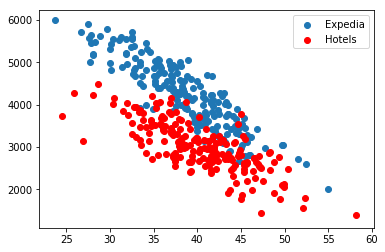

In [89]:
plt.scatter(p_ex_obs_1, d_ex_obs_1)
plt.scatter(p_h_obs_1, d_h_obs_1, c = 'red')
plt.legend(['Expedia', 'Hotels'])

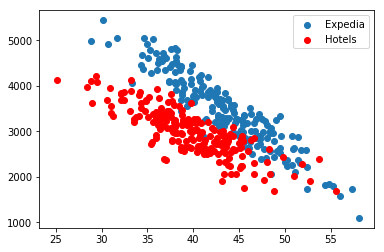

In [90]:
plt.scatter(p_ex_obs_2, d_ex_obs_2)
plt.scatter(p_h_obs_2, d_h_obs_2, c = 'red')
plt.legend(['Expedia', 'Hotels'])

In [91]:
from itertools import chain
d_ex_obs = list(chain(*[d_ex_obs_1, d_ex_obs_2]))
d_h_obs = list(chain(*[d_h_obs_1, d_h_obs_2]))
p_ex_obs = list(chain(*[p_ex_obs_1, p_ex_obs_2]))
p_h_obs = list(chain(*[p_h_obs_1, p_h_obs_2]))
t = range(len(d_ex_obs))

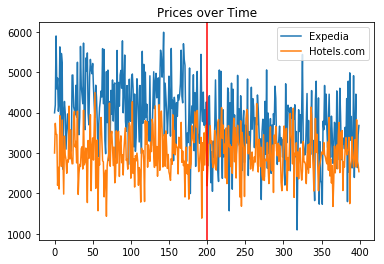

In [92]:
plt.plot(t, d_ex_obs)
plt.plot(t, d_h_obs)
plt.axvline(x=periods, c='r')
plt.title('Prices over Time')
plt.legend(['Expedia', 'Hotels.com'])

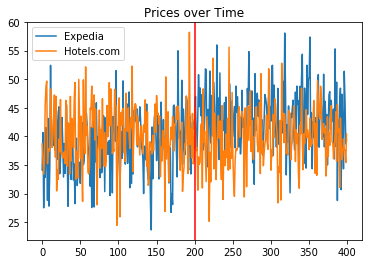

In [93]:
plt.plot(t, p_ex_obs)
plt.plot(t, p_h_obs)
plt.axvline(x=periods, c='r')
plt.title('Prices over Time')
plt.legend(['Expedia', 'Hotels.com'])

In [94]:
After = len(t)/2*[0]+len(t)/2*[1] 
# creates the dummy variable where After=0 is before increase in cost and After=1 is after increase in cost

In [95]:

results_ex = OLS(d_ex_obs, sm.add_constant(p_ex_obs)).fit()
results_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2194.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          5.12e-164
Time:                        16:07:01   Log-Likelihood:                -2902.6
No. Observations:                 400   AIC:                             5809.
Df Residuals:                     398   BIC:                             5817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9529.7982    122.415     77.848      0.000    9289.137    9770.460
x1          -138.8696      2.965    -46.838      0.000    -144.698    -133.041
==============================================================================
Omnibus:                        1.131   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.220
Skew:                          -0.091   Prob(JB):                        0.543
Kurtosis:                       2.800   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
print "Parameter Results A = " +str(results_ex.params[0])+' B='+str(results_ex.params[1])

Parameter Results A = 9529.798242134522 B=-138.86957725829143


In [97]:
d = d_ex_obs + d_h_obs # stacks demand from 2 sites
p = p_ex_obs + p_h_obs # stacks prices from two sites 
site = len(p_ex_obs)*[1]+len(p_h_obs)*[0] # creates dummy for site 
t = t*2 # Stacks time variable
After_all = 2*After # stacks 2 after vectors together

In [98]:
import pandas as pd
df = pd.DataFrame(list(zip(d,p,site,After_all,t)), columns = ['Demand', 'Price', 'Site', 'After', 't' ])
df.head()

,Demand,Price,Site,After,t
0,3994.232325,34.150225,1,0,0
1,4188.846209,40.678008,1,0,1
2,5896.863999,27.519139,1,0,2
3,4584.298947,38.067313,1,0,3
4,4854.406234,32.817388,1,0,4


In [99]:
import statsmodels.formula.api as smf
results = smf.ols(formula='Price ~ Site*After+t', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     23.03
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           5.01e-18
Time:                        16:08:07   Log-Likelihood:                -2453.4
No. Observations:                 800   AIC:                             4917.
Df Residuals:                     795   BIC:                             4940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7592      0.487     81.723      0.000      38.804      40.714
Site          -1.7167      0.521     -3.294      0.001      -2.740      -0.694
After         -1.3682      0.824     -1.660      0.097      -2.986       0.249
Site:After     5.2144      0.737      7.074      0.000       3.768       6.661
t              0.0046      0.003      1.434      0.152      -0.002       0.011
==============================================================================
Omnibus:                        1.685   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.612
Skew:                           0.029   Prob(JB):                        0.447
Kurtosis:                       3.212   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
delta_p = results.params['Site:After']
delta_c = delta_p*2
print 'Estimated Change in Cost: ' + str(delta_c)

Estimated Change in Cost: 10.428820968885267


In [102]:
results = smf.ols(formula='Demand ~ Site*After+t*After', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.44
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.23e-74
Time:                        16:11:27   Log-Likelihood:                -6349.7
No. Observations:                 800   AIC:                         1.271e+04
Df Residuals:                     794   BIC:                         1.274e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3042.3877     75.785     40.145      0.000    2893.625    3191.151
Site        1225.8908     67.988     18.031      0.000    1092.434    1359.347
After        171.5737    197.869      0.867      0.386    -216.834     559.981
Site:After  -738.6561     96.149     -7.682      0.000    -927.392    -549.920
t             -0.3160      0.589     -0.537      0.592      -1.472       0.840
t:After       -0.4590      0.833     -0.551      0.582      -2.094       1.176
==============================================================================
Omnibus:                        0.336   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.312
Skew:                          -0.048   Prob(JB):                        0.856
Kurtosis:                       3.002   Cond. No.                     2.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculate structural demand parameters

In [103]:
b_param = results.params['Site:After']*2/delta_c
b_param

-141.6566897561966

In [48]:
# A parameter using only first half data
a_param_1 = np.mean(np.array(d_ex_obs_1)-np.array(p_ex_obs_1)*b_param)
a_param_1

9990.156291719906

In [104]:
# A parameter using only second half data
a_param_2 = np.mean(np.array(d_ex_obs_2)-np.array(p_ex_obs_2)*b_param)
a_param_2

9597.120511886122

In [105]:
# A parameter using all the data, notice that the A parameter is just the average of demand - b_parameter*prices.
a_param = np.mean(np.array(d_ex_obs)-np.array(p_ex_obs)*b_param)
a_param

9643.732398100507

In [51]:
from itertools import chain
periods = 200
params1 = 10000, 150,7000, 100, 10,10, 2000 # True demand and cost parameters
params2 = 10000, 150,7000, 100, 20,10, 2000 # True demand and cost parameters
shockparams = 300,100,100,5,5
params = [periods, params1, params2, shockparams]
def simulate_a_bunch(numsims, params):
    periods, params1, params2, shockparams = params
    A_ols = list()
    b_ols = list()
    A_dd = list()
    b_dd = list()
    for s in range(numsims):
        data = _simulate_(periods, params1, params2, shockparams)
        d_ex_obs_1,d_h_obs_1,p_ex_obs_1,p_h_obs_1,d_ex_obs_2,d_h_obs_2,p_ex_obs_2,p_h_obs_2 = data
        d_ex_obs = list(chain(*[d_ex_obs_1, d_ex_obs_2]))
        d_h_obs = list(chain(*[d_h_obs_1, d_h_obs_2]))
        p_ex_obs = list(chain(*[p_ex_obs_1, p_ex_obs_2]))
        p_h_obs = list(chain(*[p_h_obs_1, p_h_obs_2]))
        t = range(len(d_ex_obs))
        results_ex = OLS(d_ex_obs, sm.add_constant(p_ex_obs)).fit()
        A_ols.append(results_ex.params[0])
        b_ols.append(-results_ex.params[1])
        d = d_ex_obs + d_h_obs # stacks demand from 2 sites
        p = p_ex_obs + p_h_obs # stacks prices from two sites 
        site = len(p_ex_obs)*[1]+len(p_h_obs)*[0] # creates dummy for site 
        t = t*2 # Stacks time variable
        After = periods*[0]+periods*[1] 
        After_all = 2*After # stacks 2 after vectors together
        df = pd.DataFrame(list(zip(d,p,site,After_all,t)), columns = ['Demand', 'Price', 'Site', 'After', 't' ])
        results = smf.ols(formula='Price ~ Site*After+t', data=df).fit()
        delta_p = results.params['Site:After']
        delta_c = delta_p*2
        results = smf.ols(formula='Demand ~ Site*After+t*After', data=df).fit()
        b_param = results.params['Site:After']*2/delta_c
        A_param = np.mean(np.array(d_ex_obs)-np.array(p_ex_obs)*b_param)
        A_dd.append(A_param)
        b_dd.append(-b_param)
    return pd.DataFrame(zip(A_ols, b_ols, A_dd, b_dd), columns = ['A_ols', 'b_ols', 'A_dd', 'b_dd'])

In [52]:
simulations = simulate_a_bunch(3000, params) # Simulate this 1000 times

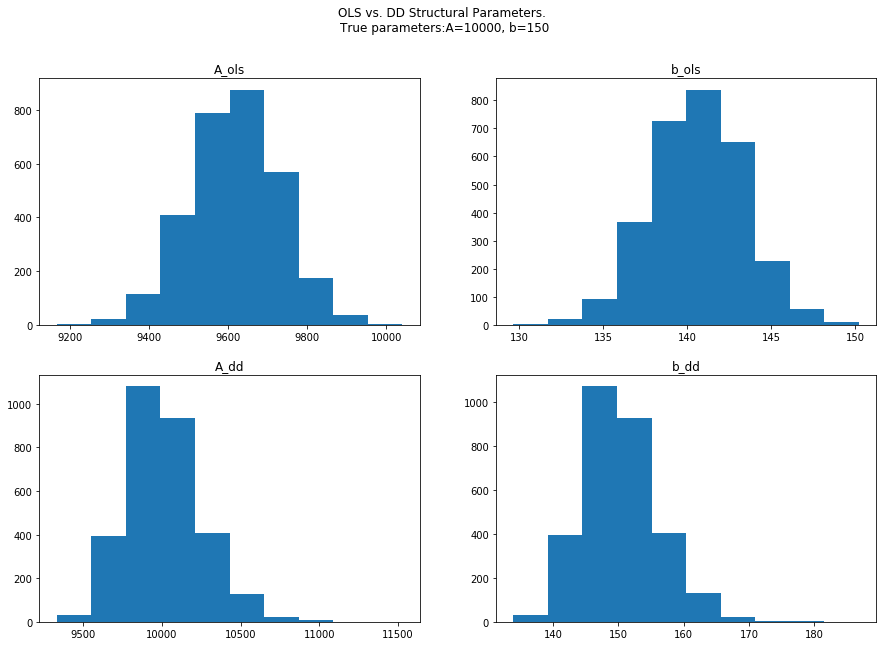

In [106]:
f, axes = plt.subplots(2,2, figsize = (15,10))
f.suptitle('OLS vs. DD Structural Parameters. \nTrue parameters:A=10000, b=150')
axes[(0,0)].hist(simulations.A_ols)
axes[(0,1)].hist(simulations.b_ols)
axes[(1,0)].hist(simulations.A_dd)
axes[(1,1)].hist(simulations.b_dd)
for i in range(2):
    t = ['ols', 'dd'][i]
    for j in range(2):
        p = ['A', 'b'][j]
        axes[(i,j)].set_title(p+'_'+t)

In [107]:
simulations.mean()

A_ols     9617.666204
b_ols      140.630624
A_dd     10013.963326
b_dd       150.337067
dtype: float64

#### Think of how you can use diff-in-diff to solve the following endogeneity issues

1. [Effect of online reviews on sales](http://journals.ama.org/doi/abs/10.1509/jmkr.43.3.345)
2. Effect of a sales promotion on sales
3. Effect of pay structure on performance
4. [Effect of responding to online reviews on subsequent reviews](http://journals.ama.org/doi/abs/10.1509/jmr.15.0511)
5. [Do managers write fake online reviews?](http://www.jstor.org/stable/pdf/42920894.pdf)

### Natural Experiment Strateg 2. Regression Discontinuity Design (This is great if you can find it)

Let's start with a demand unrelated question, does getting a scholarship improve student performance?

On face value, we may think that there is probably a correlation between GPA and scholarship. However, what causes what? On the one hand, individuals who are more likely to receive a scholarship are likely to be better students, and more likely to get a scholarship. On the other hand, individuals who get scholarships are less likely to need to work/ have stress of taking out student loans, etc...

So how do we resolve this issue?

Let's think of a simple (perhaps naive) strategy to estimate effect of scholarships on student performance:

$$\text{GPA} = \beta_0+\delta \text{Scholarship}+e$$

Let $e$ represents the characteristic that is unobserved in the data, but observed by the scholarship committee (say written essays) and that this error is correlated with SAT performance.

$$ e\sim N(0,.2) $$

Simultaneously, let's say scholarships are awarded as follows:


\begin{equation}
  \text{Scholarship} =
  \begin{cases}
    1 & \text{if SAT>1800} \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}



Text(0.5,1,u'GPA vs SAT')

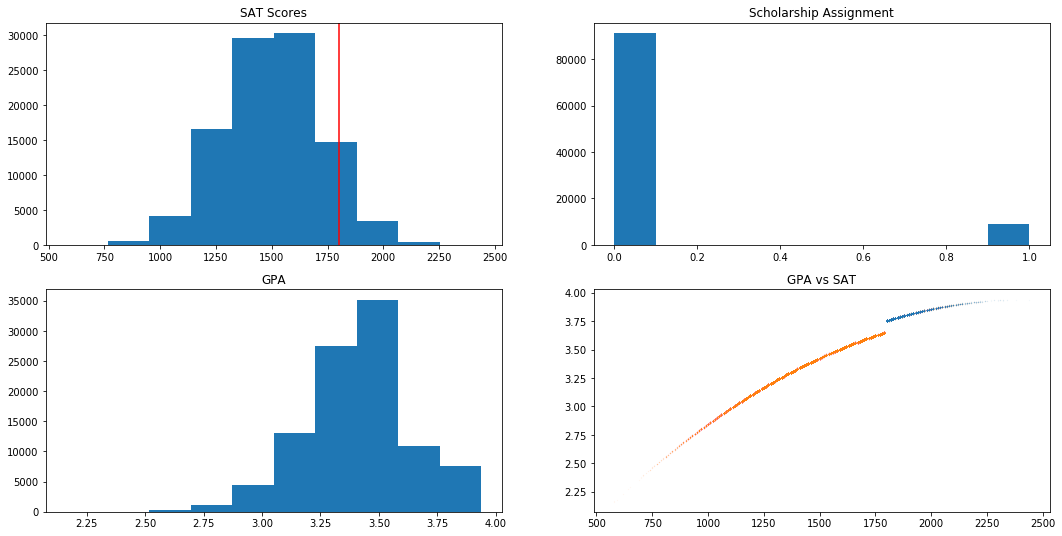

In [55]:
obs = 100000
b0 = 2.3
d = .1
b1 = .0015
b2  = -.0000005
cutoff = 1800
e = np.random.normal(0,.2, obs)
SAT = np.array([np.round(s/10)*10 for s in (1100*e+1500)])
Scholarship = [int(max(min(np.round((np.sign(s-cutoff)+1)/2+e[i]/10), 1), 0))for i,s in enumerate(SAT)]
GPA = b0+d*np.array(Scholarship)+b1*SAT+b2*np.square(SAT)+e
df = pd.DataFrame(zip(GPA, Scholarship, SAT), columns = ['GPA', 'Scholarship', 'SAT'])
f, axes = plt.subplots(2,2, figsize = (18,9))
axes[(0,0)].hist(SAT)
axes[(0,0)].axvline(x=cutoff, c='r')
axes[(0,0)].set_title('SAT Scores')
axes[(0,1)].hist(Scholarship)
axes[(0,1)].set_title('Scholarship Assignment')
axes[(1,0)].hist(GPA)
axes[(1,0)].set_title('GPA')
axes[(1,1)].scatter([SAT[i] for i,s in enumerate(Scholarship) if s==1], [GPA[i] for i,s in enumerate(Scholarship) if s==1], s=.01, alpha = .2)
axes[(1,1)].scatter([SAT[i] for i,s in enumerate(Scholarship) if s==0], [GPA[i] for i,s in enumerate(Scholarship) if s==0], s =.01, alpha =.2)
axes[(1,1)].set_title('GPA vs SAT')

In [56]:
results = smf.ols(formula = 'GPA~Scholarship', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                 4.696e+04
Date:                Mon, 26 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:37:39   Log-Likelihood:                 30268.
No. Observations:              100000   AIC:                        -6.053e+04
Df Residuals:                   99998   BIC:                        -6.051e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3711      0.001   5693.765      0.000       3.370       3.372
Scholarship     0.4320      0.002    216.707      0.000       0.428       0.436
==============================================================================
Omnibus:                    13930.177   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22521.602
Skew:                          -0.963   Prob(JB):                         0.00
Kurtosis:                       4.302   Cond. No.                         3.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print 'We overestimate the effect of the scholarship to be: ' + str(results.params[1])

We overestimate the effect of the scholarship to be: 0.4319741431181099


In [58]:
results = smf.ols(formula = 'GPA~Scholarship + SAT', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.502e+06
Date:                Mon, 26 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:37:39   Log-Likelihood:             2.2418e+05
No. Observations:              100000   AIC:                        -4.483e+05
Df Residuals:                   99997   BIC:                        -4.483e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9419      0.001   2931.570      0.000       1.941       1.943
Scholarship     0.0055      0.000     15.822      0.000       0.005       0.006
SAT             0.0010    4.5e-07   2175.625      0.000       0.001       0.001
==============================================================================
Omnibus:                    61811.616   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           992761.103
Skew:                          -2.713   Prob(JB):                         0.00
Kurtosis:                      17.450   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
print 'Merely controlling for SAT is not enough unless we know the exact functional form of the relationship.'
print 'The estimated effect is now : '+str(results.params['Scholarship'])

Merely controlling for SAT is not enough unless we know the exact functional form of the relationship.
The estimated effect is now : 0.005495447470698454


In order to properly estimate this, we roughly need 2 things.
1. We should limit the window of data around the point of scholarship assignment.
2. We should try to estimate the effect of scholarship on top of the underlying continuous determinant of scholarship, SAT.

The idea is that the performance between someone with just under the scholarship cutoff and just above the scholarship cutoff should be similar in the absence of scholarships, so that any difference between the 2 groups should be due to the scholarship.

In [60]:
df['Window'] = df.SAT.apply(lambda x: np.abs(x-cutoff+5))
df.head()

,GPA,Scholarship,SAT,Window
0,3.776176,1,1840.0,45.0
1,3.338302,0,1410.0,385.0
2,3.280838,0,1350.0,445.0
3,3.157062,0,1240.0,555.0
4,3.356828,0,1430.0,365.0


#### First, let's look at a strict window (within 20 points of cutoff)

Text(0.5,1,u'GPA vs SAT')

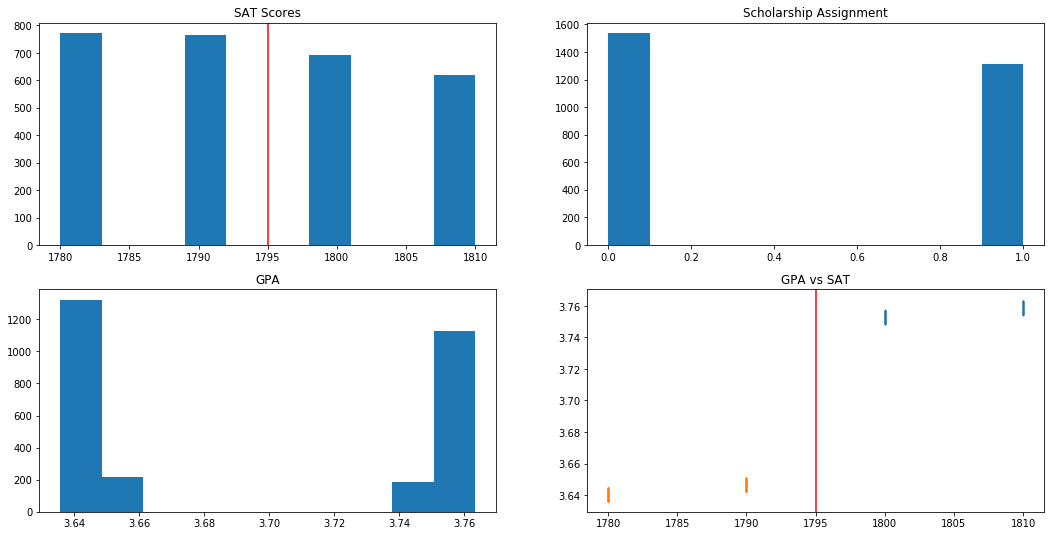

In [61]:
temp = df[df.Window<=20]  # let's restrict it to those within 20 points of the scholarship threshold
len(temp)
f, axes = plt.subplots(2,2, figsize = (18,9))
axes[(0,0)].hist(temp.SAT)
axes[(0,0)].axvline(x=cutoff-5, c='r')
axes[(0,0)].set_title('SAT Scores')
axes[(0,1)].hist(temp.Scholarship)
axes[(0,1)].set_title('Scholarship Assignment')
axes[(1,0)].hist(temp.GPA)
axes[(1,0)].set_title('GPA')
axes[(1,1)].scatter(temp.SAT[temp.Scholarship==1], temp.GPA[temp.Scholarship==1], s=.1, alpha = .3)
axes[(1,1)].scatter(temp.SAT[temp.Scholarship==0], temp.GPA[temp.Scholarship==0], s = .1, alpha = .3)
axes[(1,1)].axvline(x=cutoff-5, c='r')
axes[(1,1)].set_title('GPA vs SAT')

Text(0.5,1,u'RDD Trend Comparisons')

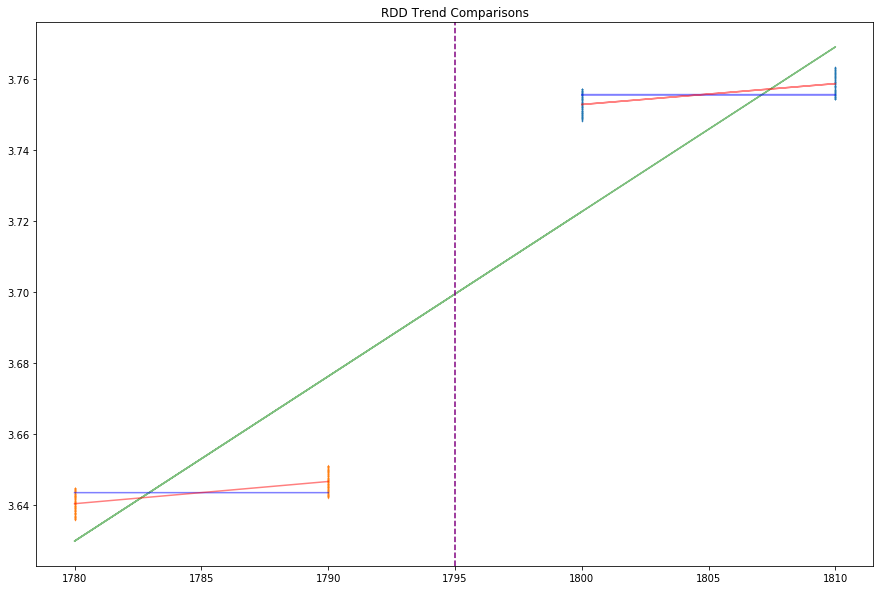

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(temp.SAT[temp.Scholarship==1], temp.GPA[temp.Scholarship==1], s=.1, alpha = .3)
plt.scatter(temp.SAT[temp.Scholarship==0], temp.GPA[temp.Scholarship==0], s = .1, alpha = .3)
params = smf.ols(formula = 'GPA~SAT', data = temp).fit().params
pred = temp.SAT.apply(lambda x: x*params['SAT']+params['Intercept'])
params = smf.ols(formula = 'GPA~Scholarship', data = temp).fit().params
pred2a = temp[temp.Scholarship == 1].apply(lambda x: x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
pred2b = temp[temp.Scholarship == 0].apply(lambda x: x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
params = smf.ols(formula = 'GPA~SAT*Scholarship', data = temp).fit().params
pred3a = temp[temp.Scholarship == 1].apply(lambda x: x.SAT*params['SAT']+x.Scholarship*params['Scholarship']+params['Intercept']+x.Scholarship*x.SAT*params['SAT:Scholarship'], axis =1)
pred3b = temp[temp.Scholarship == 0].apply(lambda x: x.SAT*params['SAT']+x.Scholarship*params['Scholarship']+params['Intercept']+x.Scholarship*x.SAT*params['SAT:Scholarship'], axis =1)
plt.plot(temp.SAT, pred, c='g', alpha = .5)
plt.plot(temp[temp.Scholarship==1].SAT, pred2a, c = 'b', alpha = .5)
plt.plot(temp[temp.Scholarship==0].SAT, pred2b, c = 'b', alpha = .5)
plt.plot(temp[temp.Scholarship==1].SAT, pred3a, c = 'r', alpha = .5)
plt.plot(temp[temp.Scholarship==0].SAT, pred3b, c = 'r', alpha = .5)
plt.axvline(x=cutoff-5, c = 'purple', linestyle = 'dashed')
plt.title('RDD Trend Comparisons')

#### Let's look at a window with 100 of the cutoff

Text(0.5,1,u'GPA vs SAT')

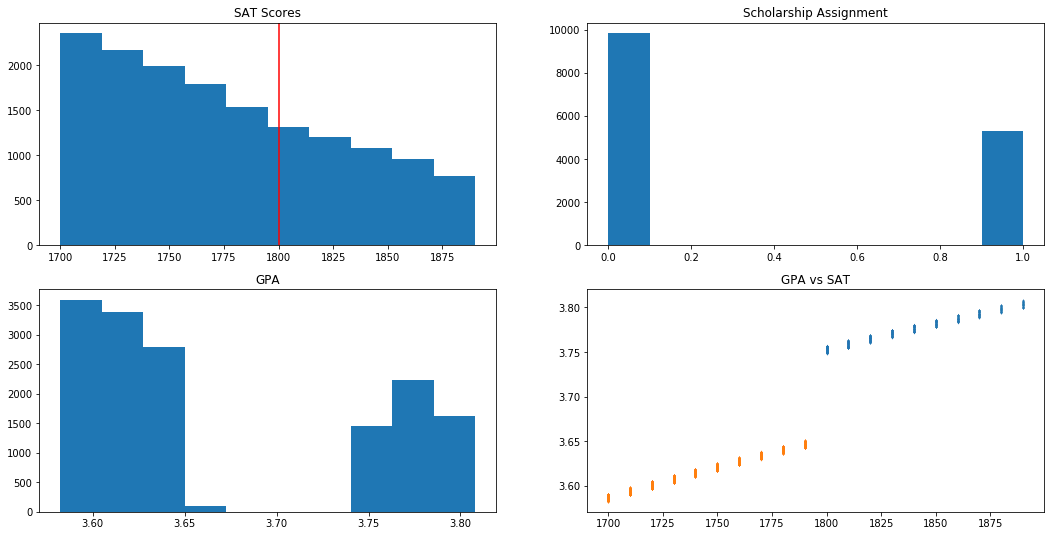

In [63]:
temp = df[df.Window<=100]  # let's restrict it to those within 20 points of the scholarship threshold
len(temp)
f, axes = plt.subplots(2,2, figsize = (18,9))
axes[(0,0)].hist(temp.SAT)
axes[(0,0)].axvline(x=cutoff, c='r')
axes[(0,0)].set_title('SAT Scores')
axes[(0,1)].hist(temp.Scholarship)
axes[(0,1)].set_title('Scholarship Assignment')
axes[(1,0)].hist(temp.GPA)
axes[(1,0)].set_title('GPA')
axes[(1,1)].scatter(temp.SAT[temp.Scholarship==1], temp.GPA[temp.Scholarship==1], s=.1, alpha = .3)
axes[(1,1)].scatter(temp.SAT[temp.Scholarship==0], temp.GPA[temp.Scholarship==0], s=.1, alpha = .3)
axes[(1,1)].set_title('GPA vs SAT')

Text(0.5,1,u'RDD Trend Comparisons')

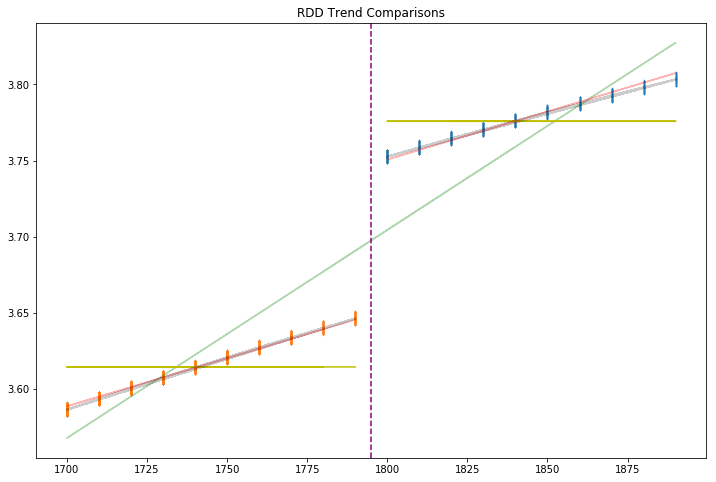

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(temp.SAT[temp.Scholarship==1], temp.GPA[temp.Scholarship==1], s=.1, alpha = .3)
plt.scatter(temp.SAT[temp.Scholarship==0], temp.GPA[temp.Scholarship==0], s = .1, alpha = .3)
# Regression with just underlying continuous covariate
params = smf.ols(formula = 'GPA~SAT', data = temp).fit().params
pred = temp.SAT.apply(lambda x: x*params['SAT']+params['Intercept'])
# Naive regression
params = smf.ols(formula = 'GPA~Scholarship', data = temp).fit().params
pred2a = temp[temp.Scholarship == 1].apply(lambda x: x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
pred2b = temp[temp.Scholarship == 0].apply(lambda x: x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
# Linear RDD
params = smf.ols(formula = 'GPA~Scholarship+SAT', data = temp).fit().params
pred3a = temp[temp.Scholarship == 1].apply(lambda x: x.SAT*params['SAT']+x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
pred3b = temp[temp.Scholarship == 0].apply(lambda x: x.SAT*params['SAT']+x.Scholarship*params['Scholarship']+params['Intercept'], axis =1)
# RDD w/ polynomial expansion
params = smf.ols(formula = 'GPA~Scholarship+SAT+np.square(SAT)+np.power(SAT,3)+np.power(SAT,4)', data = temp).fit().params
pred4a = temp[temp.Scholarship == 1].apply(lambda x: x.SAT*params['SAT']
                                           +x.Scholarship*params['Scholarship']
                                           +params['Intercept']
                                           +params['np.square(SAT)']*np.square(x.SAT)
                                           +params['np.power(SAT, 3)']*np.power(x.SAT,3)
                                           +params['np.power(SAT, 4)']*np.power(x.SAT,4), axis =1)
pred4b = temp[temp.Scholarship == 0].apply(lambda x: x.SAT*params['SAT']
                                           +x.Scholarship*params['Scholarship']
                                           +params['Intercept']
                                           +params['np.square(SAT)']*np.square(x.SAT)
                                           +params['np.power(SAT, 3)']*np.power(x.SAT,3)
                                           +params['np.power(SAT, 4)']*np.power(x.SAT,4), axis =1)
plt.plot(temp.SAT, pred, c='g', alpha = .3)
plt.plot(temp[temp.Scholarship==1].SAT, pred2a, c = 'y', alpha = 1)
plt.plot(temp[temp.Scholarship==0].SAT, pred2b, c = 'y', alpha = 1)
plt.plot(temp[temp.Scholarship==1].SAT, pred3a, c = 'r', alpha = .3)
plt.plot(temp[temp.Scholarship==0].SAT, pred3b, c = 'r', alpha = .3)
plt.plot(temp[temp.Scholarship==1].SAT, pred4a, c = 'black', alpha = .2)
plt.plot(temp[temp.Scholarship==0].SAT, pred4b, c = 'black', alpha = .2)
plt.axvline(x=cutoff-5, c = 'purple', linestyle = 'dashed')
plt.title('RDD Trend Comparisons')

**The equation we want to estimate to calculate $\delta$ is (The Orange lines):**

$$\text{GPA}=\beta_0+\delta \text{Scholarship} +\beta_1\text{SAT}+e$$

Text(0.5,1,u'Delta Parameters vs. Window\nSmaller Windows lead to less biased estimates!')

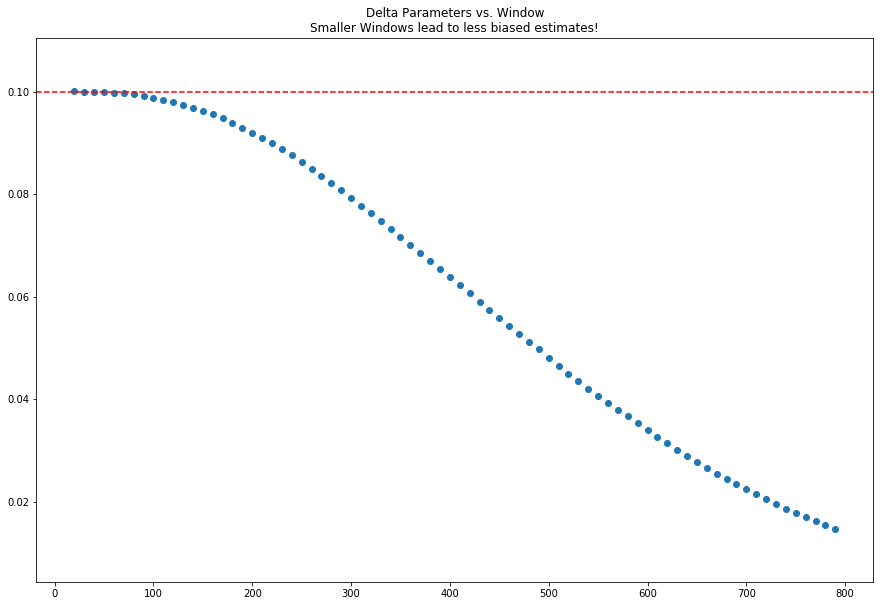

In [65]:
Results = list()
delta = list()
windows = range(20, 800, 10)
for w in windows:
    temp = df[df.Window<=w]
    results = smf.ols(formula = 'GPA~Scholarship+SAT', data = temp).fit()
    Results.append(results)
    delta.append(results.params['Scholarship'])
plt.figure(figsize = (15,10))
plt.scatter(windows, delta)
plt.axhline(y=.1, c='r', linestyle = 'dashed')
plt.title('Delta Parameters vs. Window\nSmaller Windows lead to less biased estimates!')

**We can also add polynomial trends to capture any nonlinearities in the effects of the underlying continuous covarite, in this case SAT score:**

$$\text{GPA}=\beta_0+\delta \text{Scholarship} +\beta_1\text{SAT}+\beta_2\text{SAT}^2+...+\beta_n\text{SAT}^n+e$$

We show the $\delta$ parameters when including higher order polynomials (up to 4th degree) below

Text(0.5,1,u'Delta Parameters vs. Window\nThe bias does not escalate as quickly!')

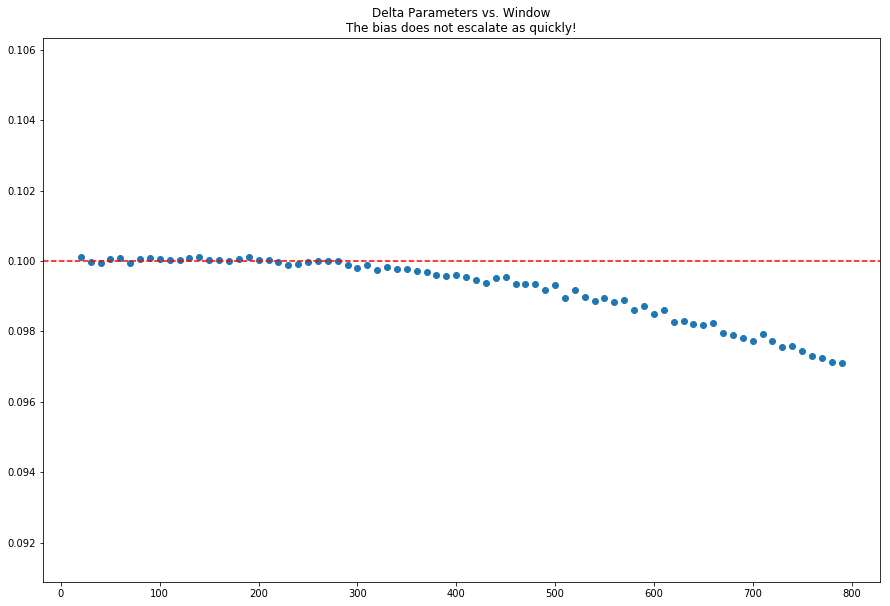

In [66]:
Results = list()
delta = list()
windows = range(20, 800, 10)
for w in windows:
    temp = df[df.Window<=w]
    results = smf.ols(formula = 'GPA~Scholarship+SAT+np.square(SAT)+np.power(SAT,3)+np.power(SAT,4)', data = temp).fit()
    Results.append(results)
    delta.append(results.params['Scholarship'])
plt.figure(figsize = (15,10))
plt.scatter(windows, delta)
plt.axhline(y=.1, c='r', linestyle = 'dashed')
plt.title('Delta Parameters vs. Window\nThe bias does not escalate as quickly!')

#### How can RDD be applied?

1. [Effect of online reviews on sales](http://www.hbs.edu/faculty/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf)
2. [Effect of manager response to online reviews on subsequent reviews](http://journals.ama.org/doi/abs/10.1509/jmr.15.0511)
3. [Effect of customer loyalty programs on customer profitability](http://pubsonline.informs.org/doi/abs/10.1287/mksc.1110.0670)
4. Effect of American made label on sales.
5. Effects of college rankings on applications.